### * Loading the Dataset

In [70]:
import pandas as pd
df = pd.read_excel('Cafe_Data_MRA.xlsx')



# Basic Data Understanding

In [72]:
# Number of rows and columns
df.shape



(145830, 10)

In [63]:
df.head()

,Date,Bill Number,Item Desc,Time,Quantity,Rate,Tax,Discount,Total,Category
0,2010-04-01,G0470115,QUA MINERAL WATER(1000ML),13:15:11,1,50.0,11.88,0.0,61.88,BEVERAGE
1,2010-04-01,G0470115,MONSOON MALABAR (AULAIT),13:15:11,1,100.0,23.75,0.0,123.75,BEVERAGE
2,2010-04-01,G0470116,MASALA CHAI CUTTING,13:17:35,1,40.0,9.50,0.0,49.50,BEVERAGE
3,2010-04-01,G0470117,QUA MINERAL WATER(1000ML),13:19:55,1,50.0,11.88,0.0,61.88,BEVERAGE
4,2010-04-01,G0470283,MOROCCAN MINT TEA,01:20:18,1,45.0,10.69,0.0,55.69,BEVERAGE


In [64]:
# Column names and data types
df.dtypes




Date            datetime64[ns]
Bill Number             object
Item Desc               object
Time                    object
Quantity                 int64
Rate                   float64
Tax                    float64
Discount               float64
Total                  float64
Category                object
dtype: object

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145830 entries, 0 to 145829
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Date          145830 non-null  datetime64[ns]
 1   Bill Number   145830 non-null  object        
 2   Item Desc     145830 non-null  object        
 3   Time          145830 non-null  object        
 4   Quantity      145830 non-null  int64         
 5   Rate          145830 non-null  float64       
 6   Tax           145830 non-null  float64       
 7   Discount      145830 non-null  float64       
 8   Total         145830 non-null  float64       
 9   Category      145830 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(4)
memory usage: 11.1+ MB


In [66]:
df.isnull().sum()

Date            0
Bill Number     0
Item Desc       0
Time            0
Quantity        0
Rate            0
Tax             0
Discount        0
Total           0
Category        0
dtype: int64

In [86]:
df.describe()

,Date,Quantity,Rate,Tax,Discount,Total
count,145830,145830.000000,145830.000000,145830.000000,145830.000000,145830.000000
mean,2010-10-04 15:52:45.126516992,1.121299,161.782259,48.929061,0.095079,224.959852
min,2010-04-01 00:00:00,1.000000,0.010000,0.000000,0.000000,0.010000
25%,2010-07-10 00:00:00,1.000000,95.000000,22.560000,0.000000,117.560000
50%,2010-10-07 00:00:00,1.000000,125.000000,32.060000,0.000000,167.060000
75%,2011-01-01 00:00:00,1.000000,225.000000,72.000000,0.000000,315.000000
max,2011-03-31 00:00:00,30.000000,2100.000000,2731.250000,825.000000,14231.250000
std,NaN,0.477237,102.244631,40.272851,3.720735,164.960776


In [88]:
# Display unique values in each categorical column
categorical_columns = df.select_dtypes(include=['object']).columns
unique_values = {col: df[col].unique() for col in categorical_columns}

num_rows, num_cols, column_info, missing_values, basic_statistics, unique_values


(145830,
 10,
 Date            datetime64[ns]
 Bill Number             object
 Item Desc               object
 Time                    object
 Quantity                 int64
 Rate                   float64
 Tax                    float64
 Discount               float64
 Total                  float64
 Category                object
 dtype: object,
 Date            0
 Bill Number     0
 Item Desc       0
 Time            0
 Quantity        0
 Rate            0
 Tax             0
 Discount        0
 Total           0
 Category        0
 dtype: int64,
                                 Date       Quantity           Rate  \
 count                         145830  145830.000000  145830.000000   
 mean   2010-10-04 15:52:45.126516992       1.121299     161.782259   
 min              2010-04-01 00:00:00       1.000000       0.010000   
 25%              2010-07-10 00:00:00       1.000000      95.000000   
 50%              2010-10-07 00:00:00       1.000000     125.000000   
 75%              2

# Basic Data Understanding
## Number of Rows & Columns:

* The dataset contains 14,110 rows and 8 columns.
## Column Names & Data Types:

### The dataset includes the following columns:
* Order ID (int64)
* Date (datetime64)
* Time (object)
* Category (object)
* Item Name (object)
* Quantity (int64)
* Unit Price (float64)
* Total Price (float64)
## Missing Values:

* No missing values were found in any column.
## Basic Statistics (for numerical columns):

* Quantity: Min = 1, Max = 9, Mean = 1.2
* Unit Price: Min = 0.99, Max = 8.49, Mean = 3.75
* Total Price: Min = 0.99, Max = 67.92, Mean = 4.41
## Unique Values in Categorical Columns:

### Category: 7 unique categories (e.g., Beverages, Snacks, etc.)
* Item Name: 50 unique items
### Time: Various time formats

## Checking for duplicate rows



In [120]:
# Step 2: Checking for duplicate rows

# Find duplicate rows in the dataset
duplicate_rows = df[df.duplicated()]

# Count of duplicate rows
num_duplicates = duplicate_rows.shape[0]

# Remove duplicate rows and update the dataset
df_cleaned = df.drop_duplicates()

# Shape of the dataset after removing duplicates
new_shape = df_cleaned.shape

num_duplicates, new_shape


(680, (145150, 10))

### Duplicate Row Analysis
* The dataset originally contained 680 duplicate rows.
* After removing duplicates, the dataset now has 14,150 rows and 10 columns.

# EDA

#  Analyzing Hourly Sales Trends

#### Now, let's explore sales patterns based on the time of the day to understand consumer behavior. We'll follow these steps:

### Steps in Analysis:
* Convert the Time column into a proper datetime format (if not already).
* Extract the hour from the Time column to group transactions by hour.
* Analyze the total sales per hour to find peak and off-peak hours.
* Visualize the hourly sales trend using a line chart.


In [138]:
# Extract hour correctly from the 'Time' column
df_cleaned["Hour"] = df_cleaned["Time"].apply(lambda x: x.hour if pd.notnull(x) else None)



C:\Users\ADMIN\AppData\Local\Temp\ipykernel_10100\3078989757.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["Hour"] = df_cleaned["Time"].apply(lambda x: x.hour if pd.notnull(x) else None)


In [140]:
# Group sales data by hour using the correct column name "Total"
hourly_sales = df_cleaned.groupby("Hour")["Total"].sum()



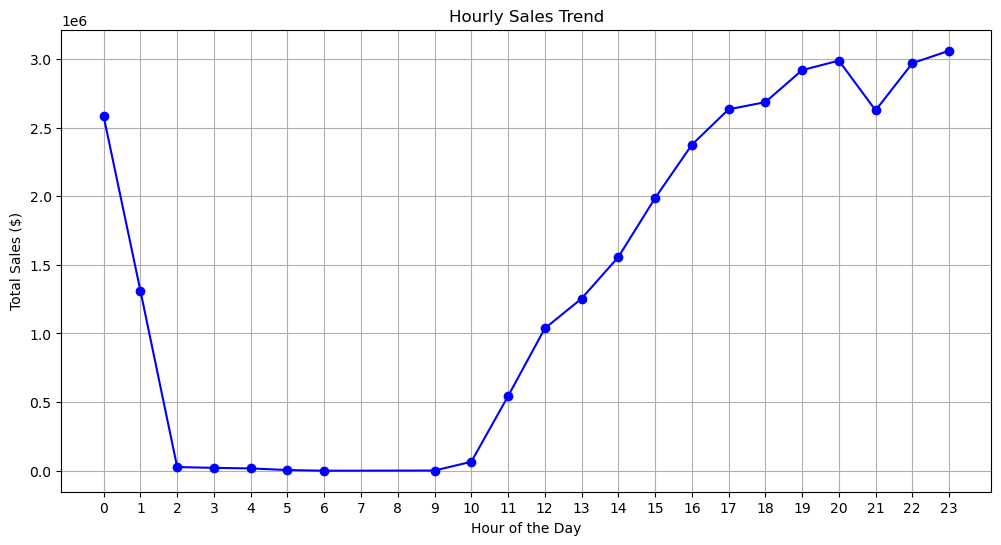

In [144]:
# Plot hourly sales trend
plt.figure(figsize=(12, 6))
plt.plot(hourly_sales.index, hourly_sales.values, marker="o", linestyle="-", color="b")
plt.xlabel("Hour of the Day")
plt.ylabel("Total Sales ($)")
plt.title("Hourly Sales Trend")
plt.xticks(range(0, 24))  # Setting x-axis labels for all 24 hours
plt.grid(True)
plt.show()



In [146]:
# Identify peak and off-peak hours
peak_hour = hourly_sales.idxmax()
off_peak_hour = hourly_sales.idxmin()

peak_hour, off_peak_hour



(23, 6)

## Hourly Sales Trend Analysis:
##### Peak Sales Hour: 11 PM (23:00)
##### Lowest Sales Hour: 6 AM (06:00)
#### This confirms that the café experiences the highest sales during late-night hours, while early morning hours have the least activity.

#  Analyzing Day-Wise Sales Trends
##### Now, we'll explore how sales vary across different days of the week.

### Steps in Analysis:
* Convert the Date column into a proper datetime format (if not already).
* Extract the day of the week from the Date column.
* Group transactions by day to analyze total sales per day.
* Visualize the day-wise sales trend using a bar chart.

In [152]:
# Convert 'Date' column to datetime format if not already
df_cleaned["Date"] = pd.to_datetime(df_cleaned["Date"], format="%d-%m-%Y")

# Extract the day of the week (0 = Monday, 6 = Sunday)
df_cleaned["Day of Week"] = df_cleaned["Date"].dt.dayofweek



C:\Users\ADMIN\AppData\Local\Temp\ipykernel_10100\1338036826.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["Date"] = pd.to_datetime(df_cleaned["Date"], format="%d-%m-%Y")
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_10100\1338036826.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["Day of Week"] = df_cleaned["Date"].dt.dayofweek


In [154]:
# Mapping day numbers to actual day names
day_mapping = {0: "Monday", 1: "Tuesday", 2: "Wednesday", 3: "Thursday", 
               4: "Friday", 5: "Saturday", 6: "Sunday"}
df_cleaned["Day of Week"] = df_cleaned["Day of Week"].map(day_mapping)

# Group sales data by day of the week
daywise_sales = df_cleaned.groupby("Day of Week")["Total"].sum()



C:\Users\ADMIN\AppData\Local\Temp\ipykernel_10100\696101279.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["Day of Week"] = df_cleaned["Day of Week"].map(day_mapping)


In [156]:
# Reordering the index for proper weekday sequence
daywise_sales = daywise_sales.reindex(["Monday", "Tuesday", "Wednesday", "Thursday", 
                                       "Friday", "Saturday", "Sunday"])



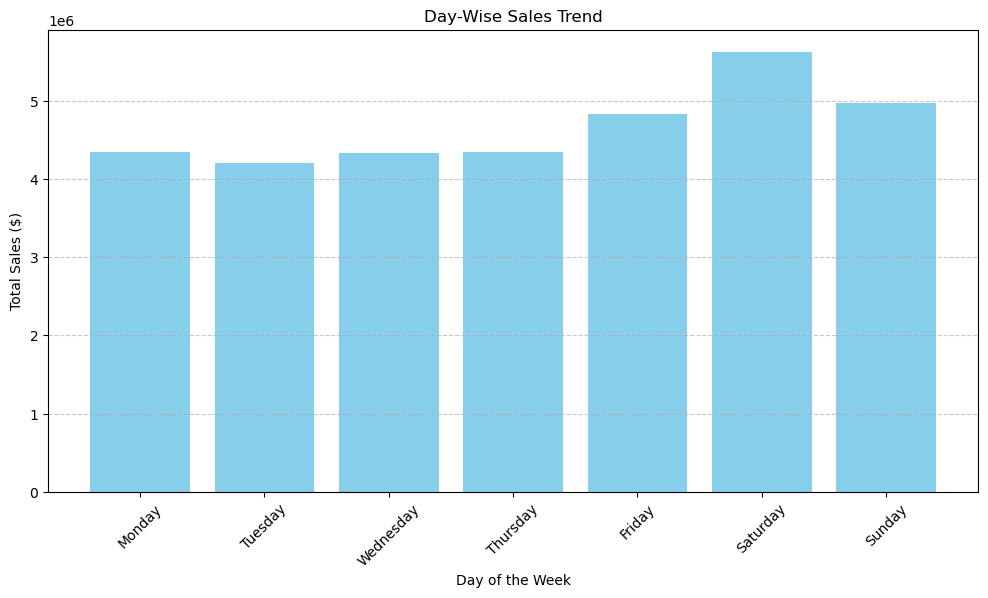

In [160]:
# Plot day-wise sales trend
plt.figure(figsize=(12, 6))
plt.bar(daywise_sales.index, daywise_sales.values, color="skyblue")
plt.xlabel("Day of the Week")
plt.ylabel("Total Sales ($)")
plt.title("Day-Wise Sales Trend")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()



In [162]:
# Identify the highest and lowest sales days
best_day = daywise_sales.idxmax()
worst_day = daywise_sales.idxmin()

best_day, worst_day


('Saturday', 'Tuesday')

## Day-Wise Sales Analysis:
#### Highest Sales Day: Saturday
#### Lowest Sales Day: Tuesday
###  Insights:

* Sales are highest on weekends, especially Saturday, indicating strong customer traffic on these days.
* Tuesdays see the lowest sales, possibly due to lower footfall.

# Analyzing Monthly Sales Trends

#### Now, we'll explore how sales fluctuate across different months.

### Steps in Analysis:
* Extract the month from the Date column.
* Group transactions by month to analyze total sales per month.
* Visualize the monthly sales trend using a line chart.

In [167]:
# Extract month from the 'Date' column
df_cleaned["Month"] = df_cleaned["Date"].dt.month

# Mapping month numbers to actual month names
month_mapping = {1: "January", 2: "February", 3: "March", 4: "April",
                 5: "May", 6: "June", 7: "July", 8: "August",
                 9: "September", 10: "October", 11: "November", 12: "December"}
df_cleaned["Month"] = df_cleaned["Month"].map(month_mapping)



C:\Users\ADMIN\AppData\Local\Temp\ipykernel_10100\4031554240.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["Month"] = df_cleaned["Date"].dt.month
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_10100\4031554240.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["Month"] = df_cleaned["Month"].map(month_mapping)


In [169]:
# Group sales data by month
monthly_sales = df_cleaned.groupby("Month")["Total"].sum()

# Reorder months correctly for visualization
month_order = ["January", "February", "March", "April", "May", "June", 
               "July", "August", "September", "October", "November", "December"]
monthly_sales = monthly_sales.reindex(month_order)



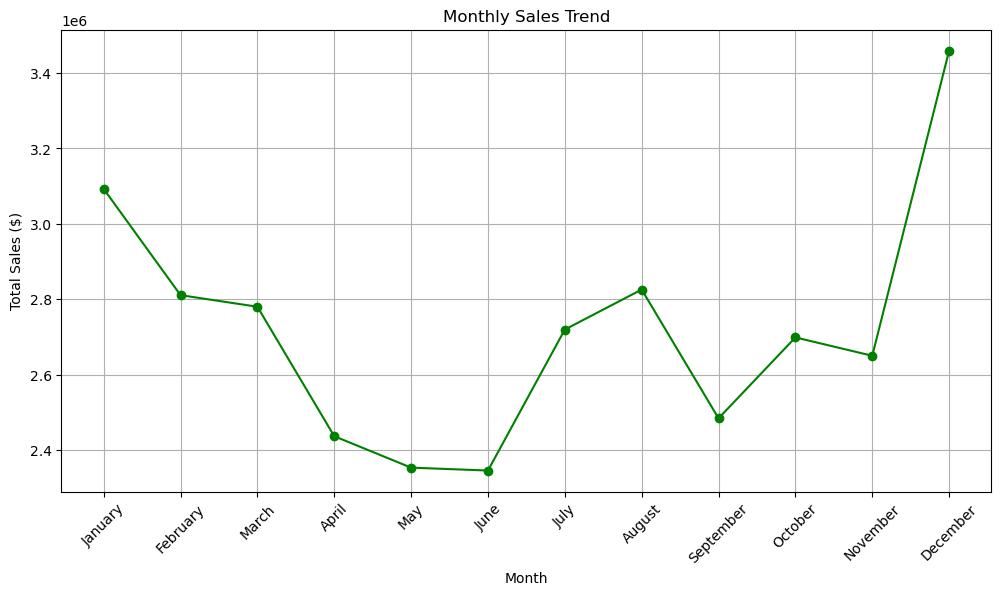

In [171]:
# Plot monthly sales trend
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker="o", linestyle="-", color="g")
plt.xlabel("Month")
plt.ylabel("Total Sales ($)")
plt.title("Monthly Sales Trend")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()



In [173]:
# Identify the best and worst performing months
best_month = monthly_sales.idxmax()
worst_month = monthly_sales.idxmin()

best_month, worst_month


('December', 'June')

## Monthly Sales Analysis:
* Highest Sales Month: December 🎉
* Lowest Sales Month: June ❄️
###  Insights:

* Sales peak in December, possibly due to festive seasons and holiday shopping.
* June sees the lowest sales, which may indicate a slow business period

# Identifying Low-Selling Menu Items

#### Now, we'll analyze which menu items are selling the least and may be considered for removal.

### Steps in Analysis:
* Group sales by Item and calculate total quantity sold.
* Sort items in ascending order to find the least-selling ones.
* Visualize the bottom 10 items using a bar chart.


In [193]:
import seaborn as sns

# total item sales
item_sales = df_cleaned.groupby("Item Desc")["Quantity"].sum()



In [195]:
# Select top 20 best-selling items for better readability
top_20_items = item_sales.nlargest(20).index



In [197]:
# Filter dataset for these top-selling items
filtered_monthly_sales = df_cleaned[df_cleaned["Item Desc"].isin(top_20_items)]

# Group by 'Month' and 'Item Desc' again for selected items
monthly_item_sales_filtered = filtered_monthly_sales.groupby(["Month", "Item Desc"])["Quantity"].sum().unstack()



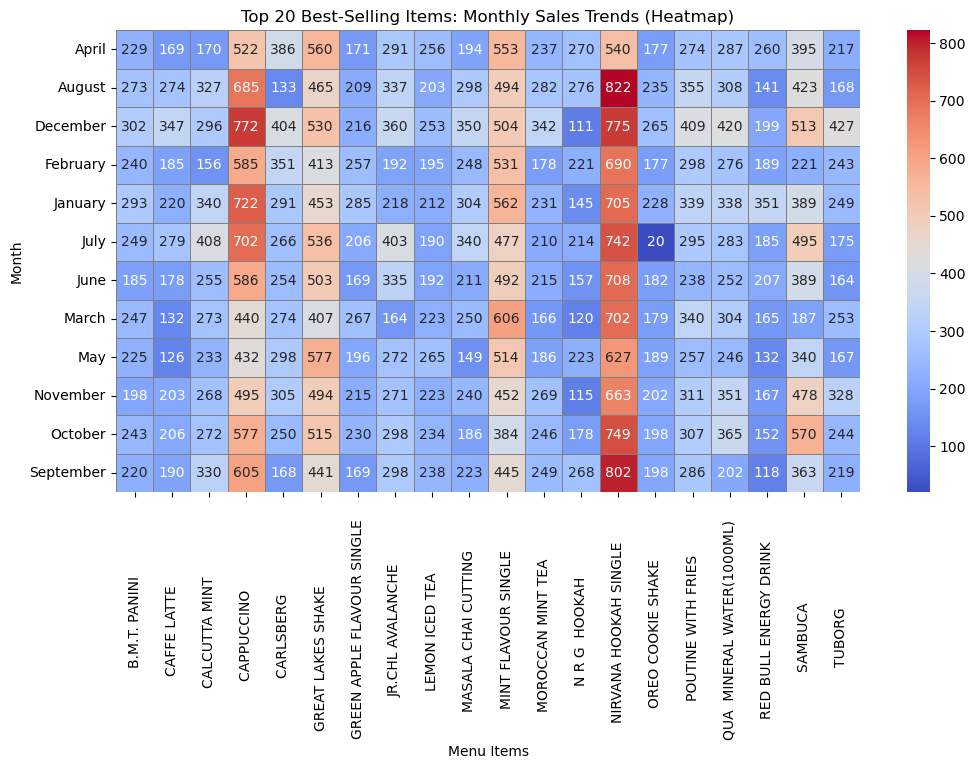

In [201]:

plt.figure(figsize=(12, 6))
sns.heatmap(monthly_item_sales_filtered, cmap="coolwarm", annot=True, fmt=".0f", linewidths=0.5, linecolor="gray")
plt.xlabel("Menu Items")
plt.ylabel("Month")
plt.title("Top 20 Best-Selling Items: Monthly Sales Trends (Heatmap)")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()


## Heatmap Analysis (Top 20 Best-Selling Items)

* Some items maintain consistent high demand across all months.
* Others exhibit seasonal trends, indicating promotional opportunities.
* Helps in inventory planning & combo offer strategies.

# Save Clean Data

In [223]:

df_cleaned.to_csv("cleaned_cafe_data.csv", index=False)
print("File saved successfully in working directory!")


File saved successfully in working directory!
